# Homework 3 (due 20th November, 11:59 PM)

1.  Use Iris dataset with only two features, namely petal length (cm) and petal width (cm).
2.  Convert your data into a two-class dataset, such that Virginica (class=2) will be one class and Setosa and Versicolor (class=1 and class=0) samples will constitute the other class. (Note: represent both of those classes as a single class)
3.  Get your new dataset ready to be fed into the provided plot_2d_examples function. (Check week 8 lecture ipynb file and library documentation.)
4.  Using plot_2d_examples function, evaluate (plot side-by-side) different SVM classifiers with **polynomial kernels of varying degrees**. Also, try several **$C$** values.


You should be able to get some figures like this:

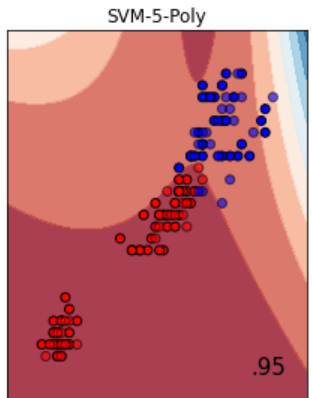

5.  Do not separate the train/test sets by yourselves, just feed into plot_2d_examples. It has its own split inside. Also it prints test set scores on the bottom right corner of each figure. According to these scores, which (degree,$C$) pair produced the best results? Please indicate your answer explicitly.
6.  Also comment on $C$ values. Which $C$ value range is reasonable do you think? After which value, it looks like an overfit?

**Important Note: Write your answers to Q5 and Q6 as two different markdown cell in Jupyter Notebook under your figures.**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
iris_dataset = load_iris()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
iris_df = pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']],columns= list(iris_dataset['feature_names']) + ['target'])
iris_df = pd.DataFrame(iris_df[['petal length (cm)','petal width (cm)','target']])
iris_df=iris_df.replace(0, 1)#https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
iris_df

,petal length (cm),petal width (cm),target
0,1.4,0.2,1.0
1,1.4,0.2,1.0
2,1.3,0.2,1.0
3,1.5,0.2,1.0
4,1.4,0.2,1.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [29]:
def plot_2d_examples(classifiers, names, datasets, figsize=(27,9), h = .02):
  """
  Here we define a helper method. We want to make a lot of visualizations, so lets 
  organize the visualization code into a method we can re-use. 
  - classifiers is a list of scikit-learn classifier objects
  - names is a list of strings corresponding to each classifier in 'classifiers'. As such they should have the same length
  - datasets will be a list of 2D datasets, each being a tuple of (X, y)
  - h is the step size of the mesh. Smaller sizes show more detail
  """
  figure = plt.figure(figsize=figsize)
  i = 1
    
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      
      X, y = ds
      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=.4, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                 edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
                 edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                     edgecolors='k')
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                     edgecolors='k', alpha=0.3)

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                  size=15, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

In [30]:
X=iris_df[iris_df.columns[0:2]]
y=iris_df ['target']
dataset=[(X,y)]

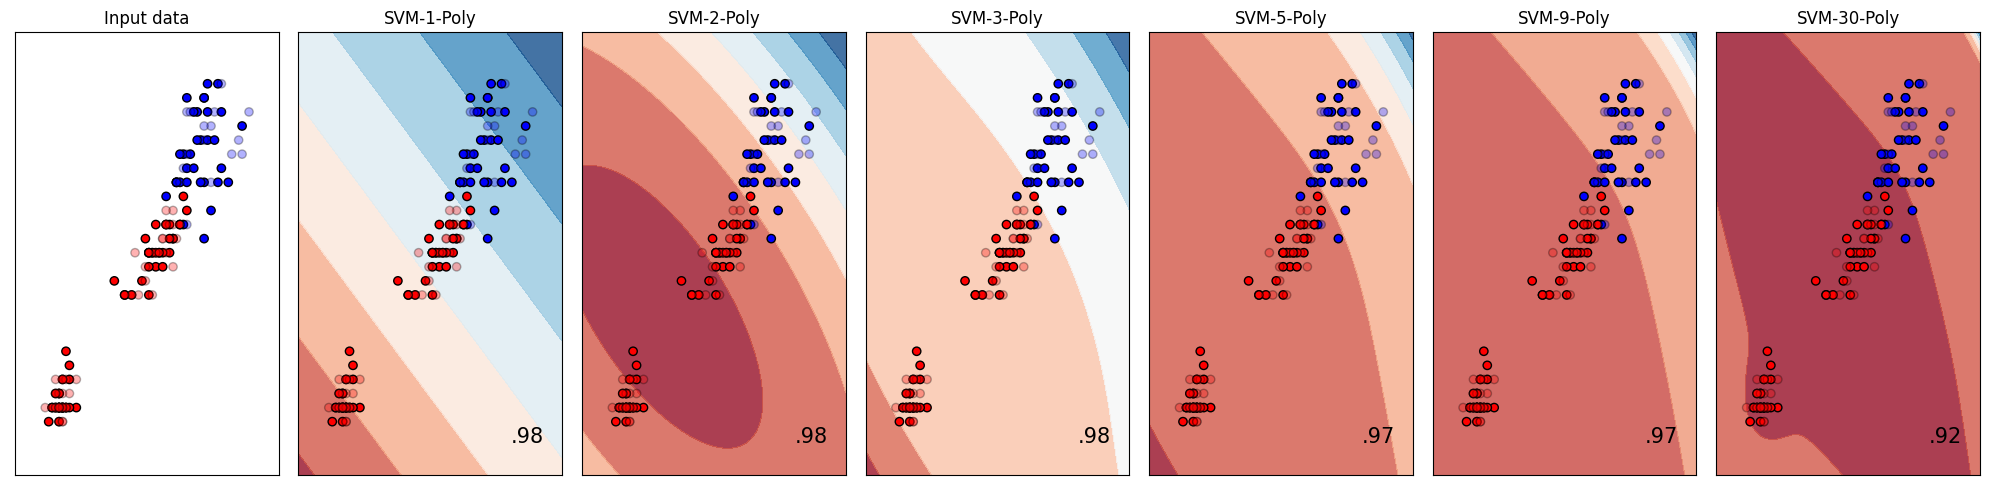

In [31]:
classifiers = []
names = []
for i in [1, 2, 3, 5, 9, 30]:
    classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=0.1))
    names.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifiers, names, dataset, figsize=(20,5))

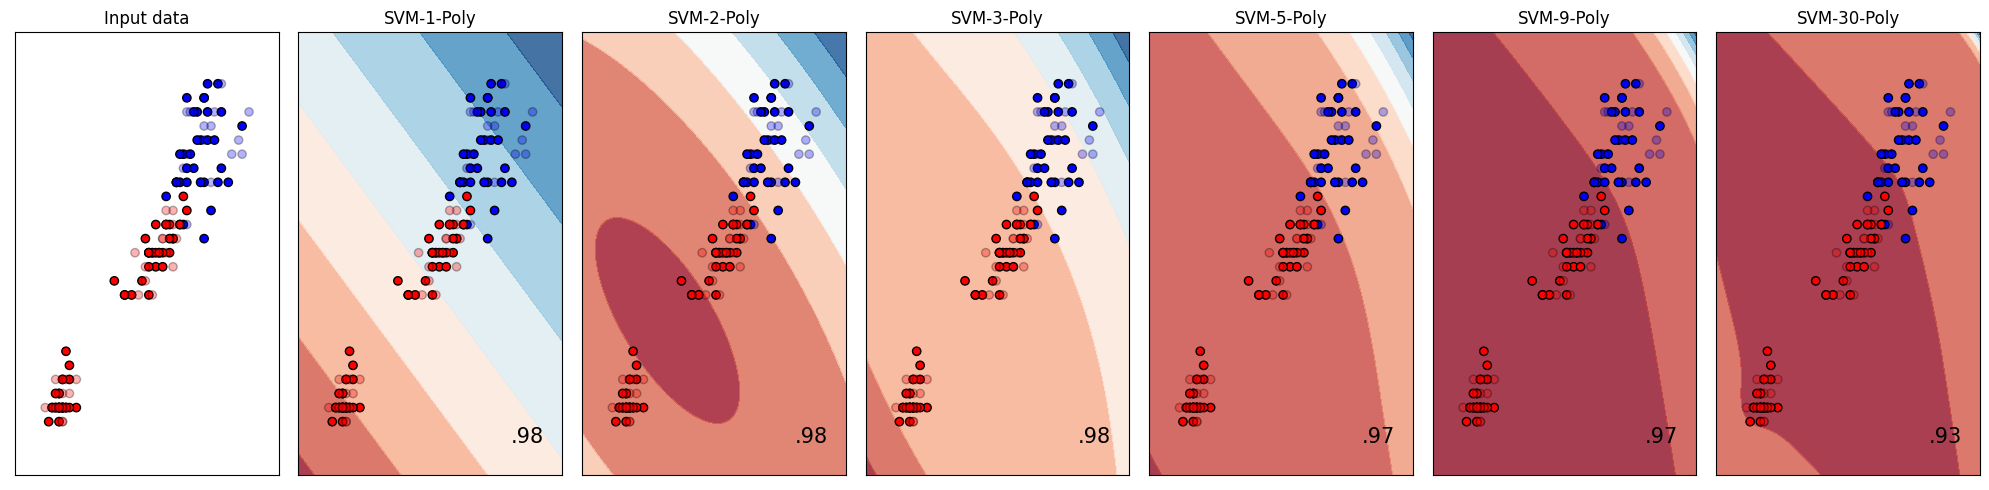

In [32]:
classifiers = []
names = []
for i in [1, 2, 3, 5, 9, 30]:
    classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=0.2))
    names.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifiers, names, dataset, figsize=(20,5))

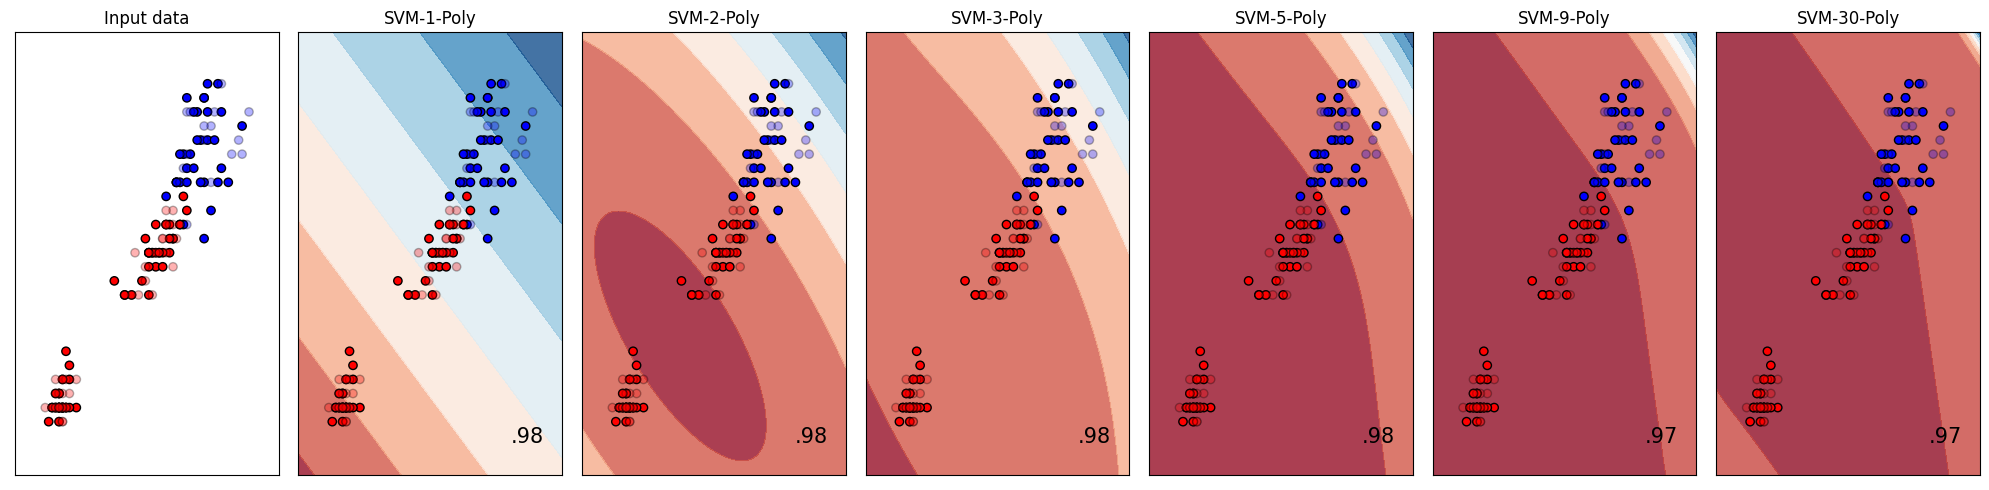

In [33]:
classifiers = []
names = []
for i in [1, 2, 3, 5, 9, 30]:
    classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=0.3))
    names.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifiers, names, dataset, figsize=(20,5))

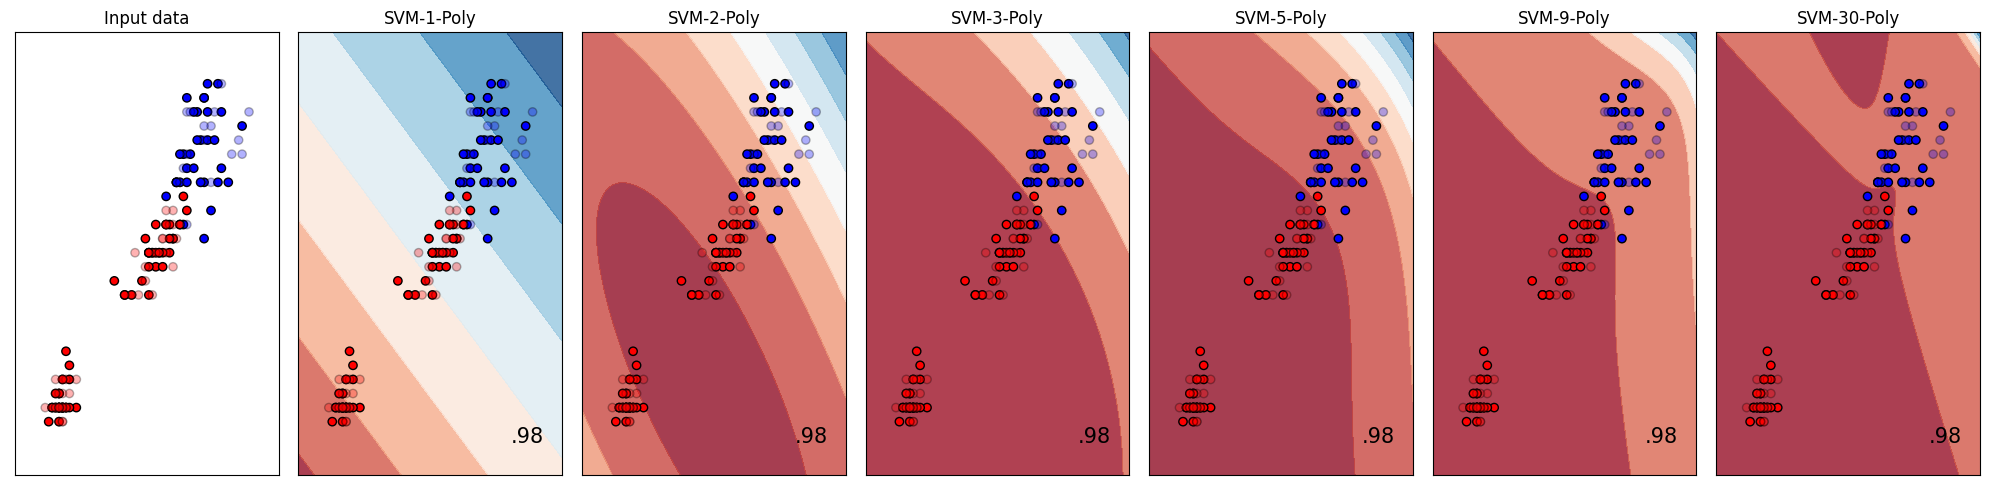

In [34]:
classifiers = []
names = []
for i in [1, 2, 3, 5, 9, 30]:
    classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=0.7))
    names.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifiers, names, dataset, figsize=(20,5))

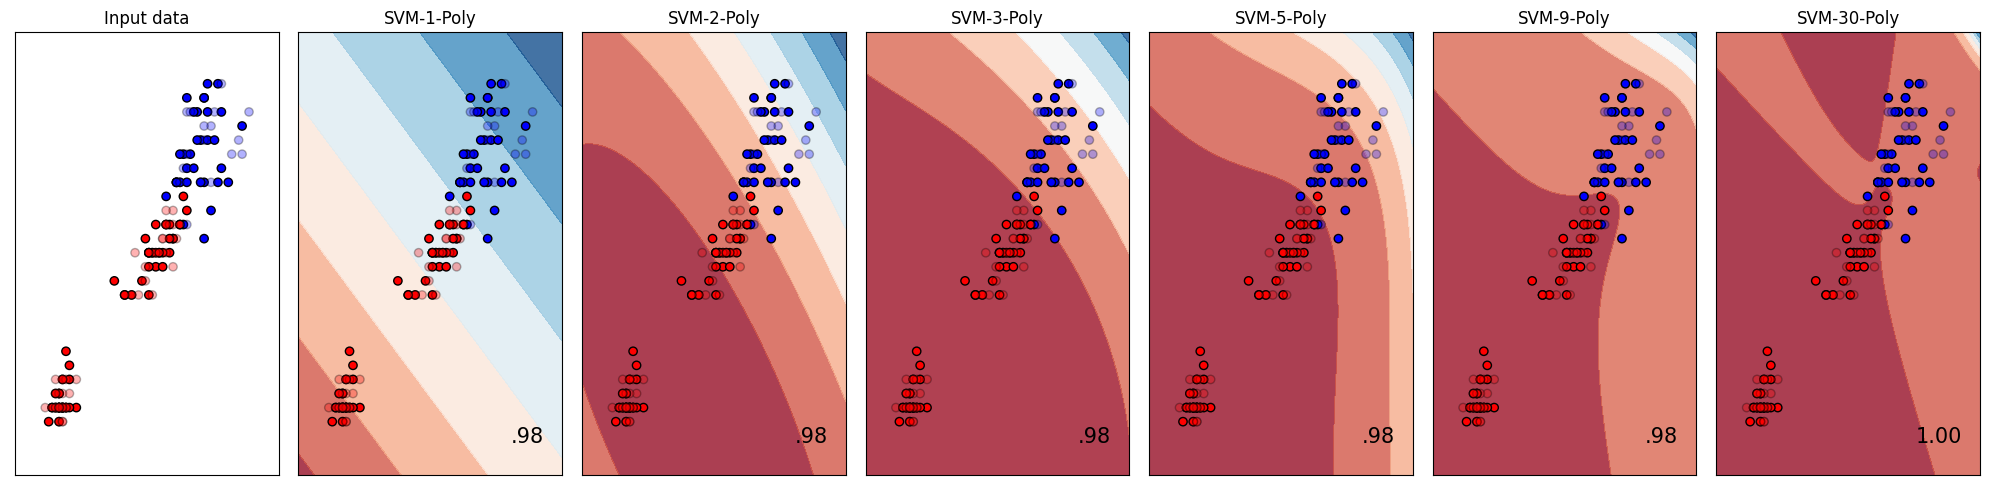

In [35]:
classifiers = []
names = []
for i in [1, 2, 3, 5, 9, 30]:
    classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=1))
    names.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifiers, names, dataset, figsize=(20,5))

When we increase C value, we can see it overfits.A large C value will result in a better fit to the data, but a larger error value. When it is low, it underfits.Smaller C values try to minimize the distance of points from the decision boundary, so smaller values ​​of C give higher scores. In my opinion the most optimal C value is around 0.3.

When degree increases, our results will be more accurate but again, it overfits when it is so high and underfits when it is so low. In my opinion, the most optimal degree is around 5.

Best pair --> C=0.3 degree= 5.